# Time Series Analysis for Forecasting


### Load the data


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('dataset.csv', index_col='Month', parse_dates=True, date_parser=lambda x: pd.to_datetime(x, format='%y-%b'))
data.head(10)

# Exclude the column with the name 'Index'
data = data.drop(columns=['Index'])



C:\Users\Franniel\AppData\Local\Temp\ipykernel_9192\1141243241.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('dataset.csv', index_col='Month', parse_dates=True, date_parser=lambda x: pd.to_datetime(x, format='%y-%b'))


In [6]:
data = data[[ 'Price', 'Production']]
data.head(12)

,Price,Production
Month,,
2014-09-01,51.51,537770
2014-10-01,51.46,1623075
2014-11-01,51.28,2277043
2014-12-01,51.65,2223994
2015-01-01,51.19,2259613
2015-02-01,51.25,3124172
2015-03-01,51.15,3939203
2015-04-01,51.95,2405134
2015-05-01,52.88,1711529


## Plotting


<Axes: xlabel='Month'>

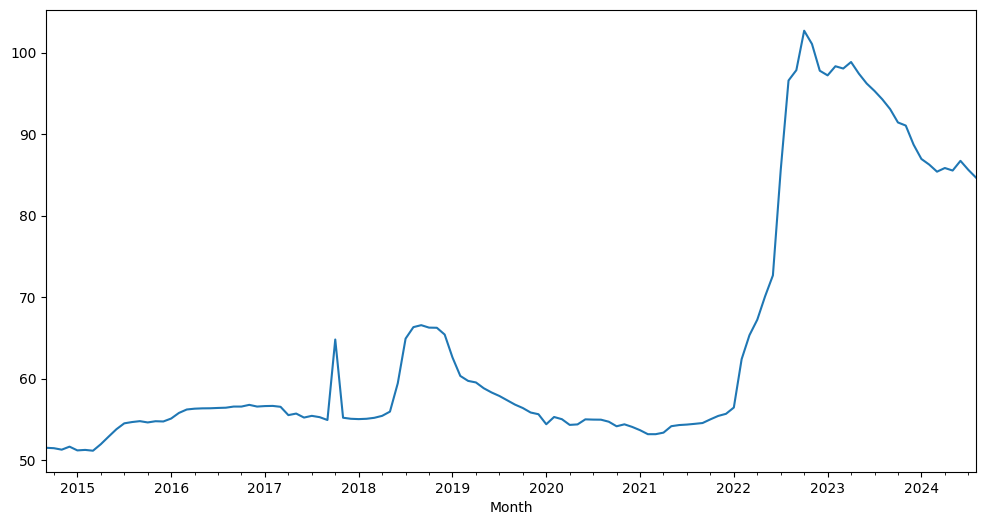

In [7]:
data['Price'].plot(figsize=(12,6))

In [8]:
# plot = data['Price']['2014-09-01' : '2015-08-01'].plot(figsize=(12, 6))

Trend


In [9]:
from statsmodels.tsa.filters.hp_filter import hpfilter

cycle, trend = hpfilter(data['Price'], lamb=1600)

type(cycle), type(trend)


(pandas.core.series.Series, pandas.core.series.Series)

In [10]:
data['Cycle'] = cycle
data['Trend'] = trend

data.head(12)

,Price,Production,Cycle,Trend
Month,,,,
2014-09-01,51.51,537770,0.562720,50.947280
2014-10-01,51.46,1623075,0.244007,51.215993
2014-11-01,51.28,2277043,-0.205057,51.485057
2014-12-01,51.65,2223994,-0.104978,51.754978
2015-01-01,51.19,2259613,-0.836130,52.026130
2015-02-01,51.25,3124172,-1.048825,52.298825
2015-03-01,51.15,3939203,-1.422850,52.572850
2015-04-01,51.95,2405134,-0.897338,52.847338
2015-05-01,52.88,1711529,-0.240531,53.120531


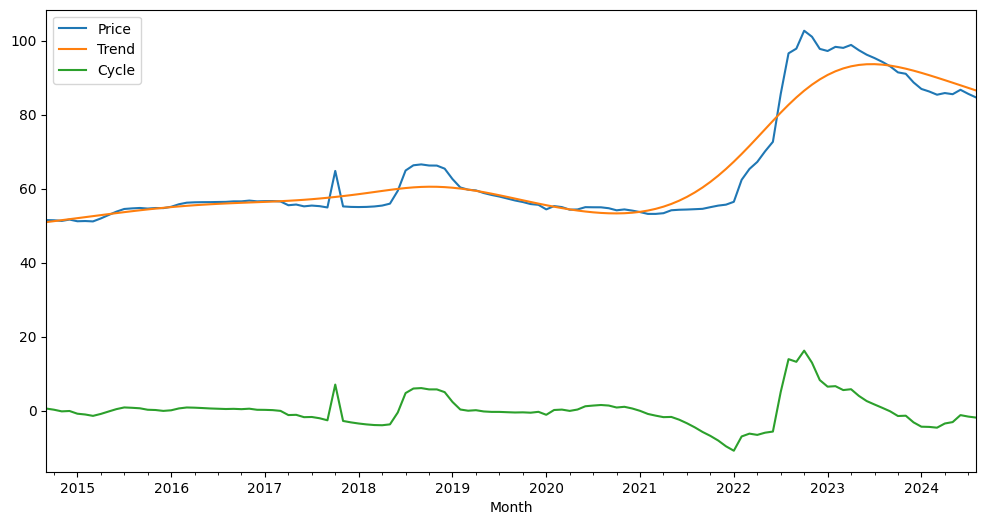

In [11]:
data[['Price', 'Trend', 'Cycle']].plot(figsize=(12, 6)).autoscale(axis = 'x', tight = True)

## Test for Stationarity


In [12]:
from statsmodels.tsa.stattools import adfuller, kpss, coint, bds, q_stat, grangercausalitytests, levinson_durbin

### Augmented Dickey-Fuller test


To determine whether a series is stationary we can use the augmented Dickey-Fuller Test. In this test the null hypothesis states that $\phi = 1$(this is also called a unit test).

The test returns several statistics we'll see in a moment. Our focus is on the p-value. A small p-value ($p < 0.05) indicates strong evidence against the null hypothesis.

To demonstrate, we'll use a dataset we know is not stationary, the airline_passenger dataset. First, let's plot the data along with a 12-month rolling mean and standard deviation:



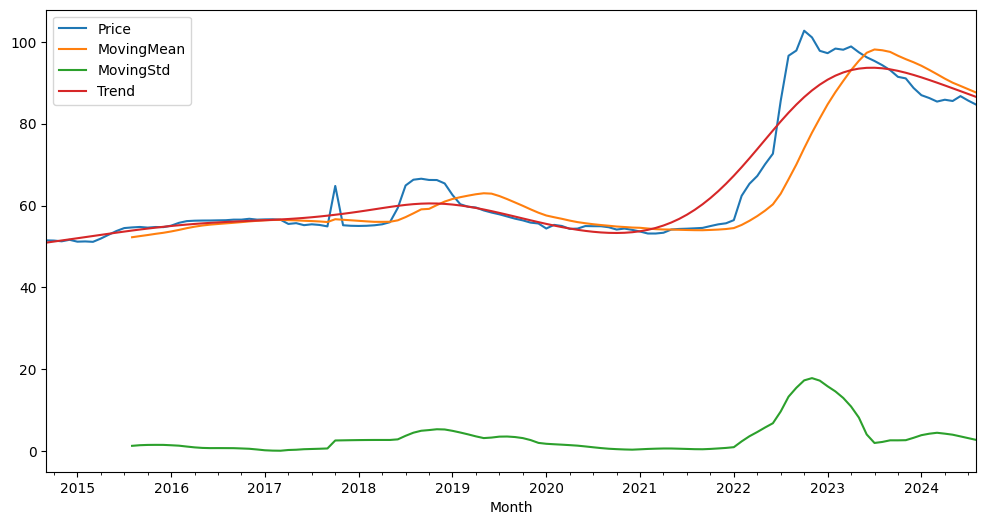

In [13]:
data['MovingMean'] = data['Price'].rolling(window = 12).mean()
data['MovingStd'] = data['Price'].rolling(window = 12).std()
data[['Price', 'MovingMean', 'MovingStd', 'Trend']].plot(figsize=(12, 6)).autoscale(axis = 'x', tight = True)

In [14]:
print('Augmented Dickey-Fuller test')
dftest = adfuller(data['Price'],autolag='AIC')
dftest

Augmented Dickey-Fuller test


(np.float64(-1.222227783206663),
 np.float64(0.663961545174224),
 2,
 117,
 {'1%': np.float64(-3.487517288664615),
  '5%': np.float64(-2.8865777180380032),
  '10%': np.float64(-2.5801239192052012)},
 np.float64(489.89559792055525))

In [15]:
adftest = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, val in dftest[4].items():
    adftest[f'critical value ({key})'] = val

print(adftest)

if adftest['p-value'] < 0.05:
    print('Reject the null hypothesis: The time series is stationary')
else:
    print('Fail to reject the null hypothesis: The time series is non-stationary')

Test Statistic                  -1.222228
p-value                          0.663962
#Lags Used                       2.000000
Number of Observations Used    117.000000
critical value (1%)             -3.487517
critical value (5%)             -2.886578
critical value (10%)            -2.580124
dtype: float64
Fail to reject the null hypothesis: The time series is non-stationary


## Train Test Split


In [16]:
data.head(12)


,Price,Production,Cycle,Trend,MovingMean,MovingStd
Month,,,,,,
2014-09-01,51.51,537770,0.562720,50.947280,NaN,NaN
2014-10-01,51.46,1623075,0.244007,51.215993,NaN,NaN
2014-11-01,51.28,2277043,-0.205057,51.485057,NaN,NaN
2014-12-01,51.65,2223994,-0.104978,51.754978,NaN,NaN
2015-01-01,51.19,2259613,-0.836130,52.026130,NaN,NaN
2015-02-01,51.25,3124172,-1.048825,52.298825,NaN,NaN
2015-03-01,51.15,3939203,-1.422850,52.572850,NaN,NaN
2015-04-01,51.95,2405134,-0.897338,52.847338,NaN,NaN
2015-05-01,52.88,1711529,-0.240531,53.120531,NaN,NaN


In [17]:
data.shape

(120, 6)

In [18]:
price = data['Price']

In [19]:
train_size = int(len(price) * 0.8)

# 80% of the data for training

train_data = price.iloc[0:train_size]
test_data = price.iloc[train_size:len(price)]

print(f'Training size: {train_size}')
print(f'Testing size: {len(price) - train_size}')


Training size: 96
Testing size: 24


In [20]:
train_data.tail(10)

Month
2021-11-01    55.42
2021-12-01    55.68
2022-01-01    56.45
2022-02-01    62.39
2022-03-01    65.33
2022-04-01    67.23
2022-05-01    70.10
2022-06-01    72.67
2022-07-01    85.60
2022-08-01    96.59
Name: Price, dtype: float64

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data, seasonal_periods=5, trend=None, seasonal=None).fit()

test_predictions = fitted_model.forecast(len(test_data))
test_predictions




C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2022-09-01    96.59
2022-10-01    96.59
2022-11-01    96.59
2022-12-01    96.59
2023-01-01    96.59
2023-02-01    96.59
2023-03-01    96.59
2023-04-01    96.59
2023-05-01    96.59
2023-06-01    96.59
2023-07-01    96.59
2023-08-01    96.59
2023-09-01    96.59
2023-10-01    96.59
2023-11-01    96.59
2023-12-01    96.59
2024-01-01    96.59
2024-02-01    96.59
2024-03-01    96.59
2024-04-01    96.59
2024-05-01    96.59
2024-06-01    96.59
2024-07-01    96.59
2024-08-01    96.59
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

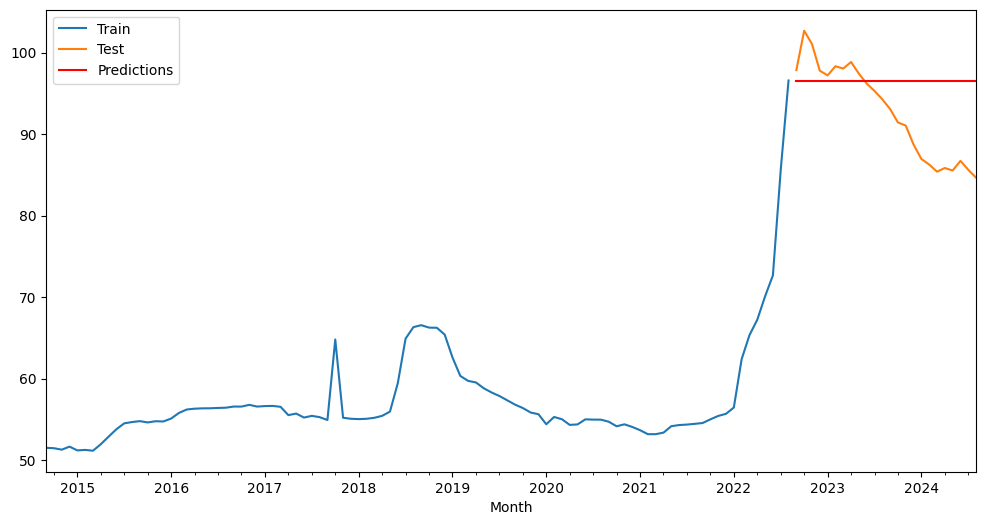

In [22]:
train_data.plot(legend=True, label = 'Train')
test_data.plot(legend=True, figsize=(12, 6), label = 'Test').autoscale(axis = 'x', tight = True)
test_predictions.plot(legend=True, label='Predictions', color='red')

## Stationarity and Differencing



<Axes: xlabel='Month'>

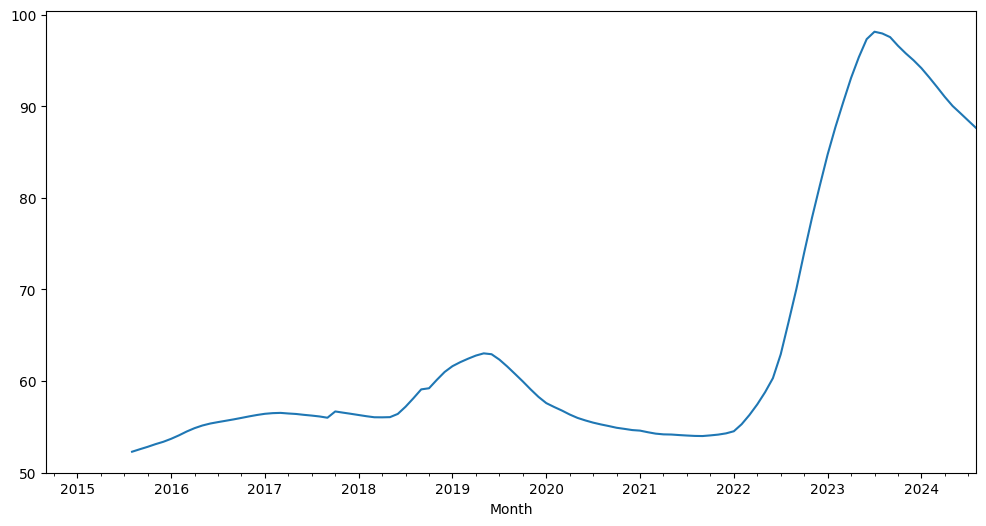

In [23]:
data['MovingMean'].plot(figsize=(12, 6), label='Moving Mean')

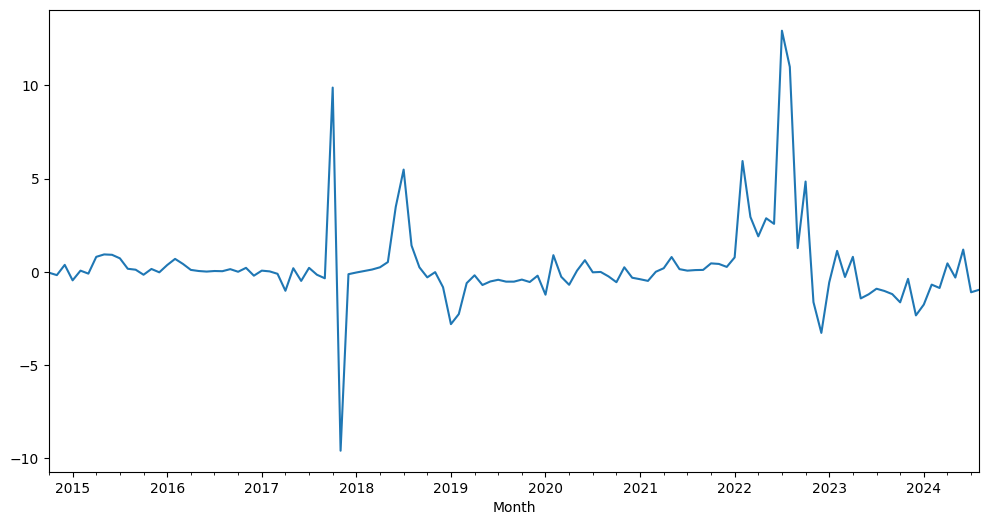

In [24]:
from statsmodels.tsa.statespace.tools import  diff 

data['dPrice'] = diff(data['Price'], k_diff=1)
data['dPrice'].plot(figsize=(12, 6), label='Differenced Price').autoscale(axis = 'x', tight = True)

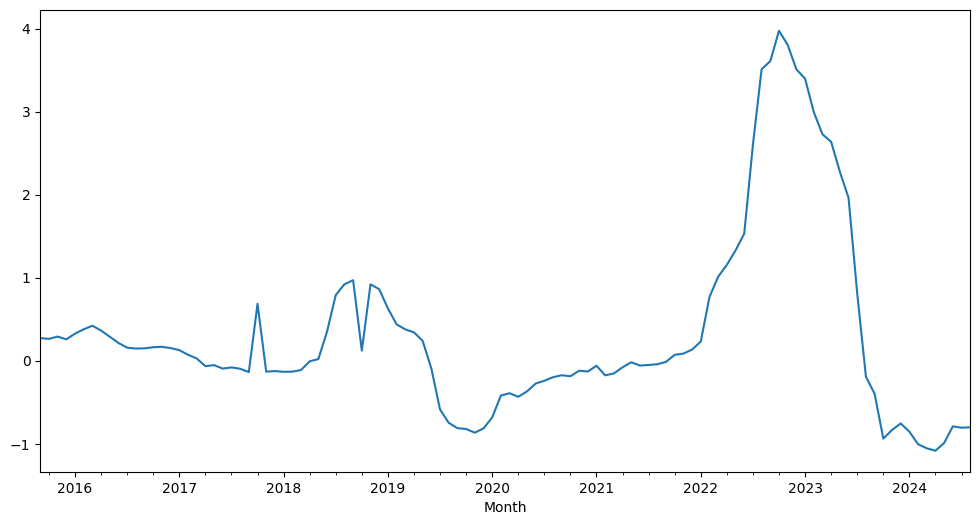

In [25]:
data['dPrice_ma'] = data['dPrice'].rolling(window=12).mean()
data['dPrice_ma'].plot(figsize=(12, 6), label='Differenced Price MA').autoscale(axis = 'x', tight = True)